## 6. Advanced Clustering Techniques:

DBSCAN

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')



In [4]:
df = pd.read_csv("/Users/yuvraj/New_Projects/Bank-Customer-Profiling-and-Segmentation/Bank-Customer-Profiling-and-Segmentation-main/data/marketing_data_clean.csv")
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
train_df, test_df = train_test_split(df,test_size=0.2, random_state=42) 

In [6]:
mm = MinMaxScaler()
train_df = mm.fit_transform(train_df)
test_df = mm.transform(test_df)

In [8]:
dbscan = DBSCAN(eps=2, min_samples=6)
dbscan.fit(train_df)
y_dbscan_pred = dbscan.labels_
y_dbscan_pred

array([0, 0, 0, ..., 0, 0, 0])

In [9]:
dbscan_df = pd.DataFrame(train_df,columns = df.columns)
dbscan_df['clusters'] = y_dbscan_pred
dbscan_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,clusters
0,0.008744,0.777778,0.012276,0.009115,0.008622,0.000000,0.777778,0.444444,0.666667,0.000000,0.000000,0.039106,0.081803,0.003606,0.001703,0.000000,0.500000,0
1,0.171255,1.000000,0.000000,0.000000,0.000000,0.003281,0.000000,0.000000,0.000000,0.055555,0.008130,0.000000,0.215359,0.020290,0.020789,0.000000,1.000000,0
2,0.027751,1.000000,0.000000,0.000000,0.000000,0.110141,0.000000,0.000000,0.000000,0.555555,0.089431,0.000000,0.031720,0.120035,0.004051,0.833333,1.000000,0
3,0.001304,0.636364,0.046507,0.000738,0.121256,0.000000,0.916667,0.083333,0.833333,0.000000,0.000000,0.033520,0.065109,0.046423,0.000276,0.000000,1.000000,0
4,0.188987,1.000000,0.001294,0.001308,0.000000,0.058706,0.083333,0.083333,0.000000,0.166667,0.048780,0.002793,0.198664,0.022010,0.016150,0.000000,1.000000,0
5,0.007240,0.272727,0.005779,0.000000,0.015309,0.023623,1.000000,0.000000,1.000000,0.055555,0.016260,0.033520,0.038397,0.031243,0.001437,0.000000,1.000000,0
6,0.001831,1.000000,0.008680,0.000000,0.022993,0.000000,1.000000,0.000000,0.875000,0.000000,0.000000,0.022346,0.031720,0.007269,0.001690,0.571429,0.333333,0
7,0.107461,1.000000,0.096866,0.081203,0.043725,0.000000,1.000000,0.833333,0.416667,0.000000,0.000000,0.064246,0.232053,0.086494,0.006724,0.000000,1.000000,0
8,0.067125,1.000000,0.000365,0.000369,0.000000,0.000000,0.083333,0.083333,0.000000,0.000000,0.000000,0.002793,0.048414,0.006974,0.005707,0.000000,1.000000,0
9,0.019080,0.818182,0.016221,0.005784,0.027804,0.000000,0.833333,0.750000,0.750000,0.000000,0.000000,0.094972,0.131886,0.043964,0.003038,0.090909,1.000000,0


In [10]:
dbscan_df['clusters'].value_counts()

clusters
0    7160
Name: count, dtype: int64

Here, using eps (minimum distance between two points) as 2 and minimum samples in a cluster as 6, we get 6 clusters with majority of them being in cluster 0

**Lets try to visualise using two variables like BALANCE and PURCHASES:**

In [11]:
X = dbscan_df[['BALANCE','PURCHASES']].to_numpy()

In [12]:
dbscan = DBSCAN(eps=0.075,min_samples=2)
dbscan.fit(X)
y_dbscan_pred = dbscan.labels_
y_dbscan_pred

array([0, 0, 0, ..., 0, 0, 0])

In [13]:
dbscan_df['clusters'] = y_dbscan_pred
dbscan_df['clusters'].value_counts()

clusters
 0    7135
-1      11
 3       3
 5       3
 1       2
 2       2
 4       2
 6       2
Name: count, dtype: int64

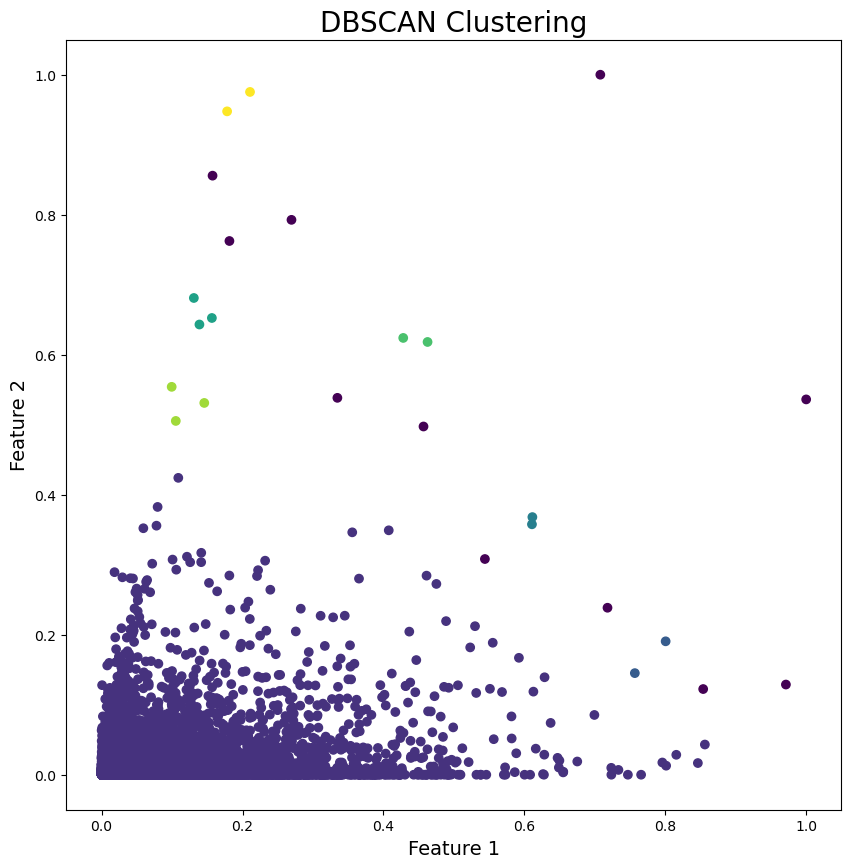

In [14]:
plt.figure(figsize = (10,10))
plt.scatter(dbscan_df['BALANCE'], dbscan_df['PURCHASES'], c = dbscan_df['clusters'])
plt.title('DBSCAN Clustering', fontsize=20)
plt.xlabel('Feature 1', fontsize=14)
plt.ylabel('Feature 2', fontsize=14)
plt.show()

Some differences that we observe in K-Means and DBSCAN are:
* Clusters formed using K-Means are more or less spherical or convex in shape and must have same feature size. But using DBSCAN, arbitrary shaped clusters can be formed.
* K-means clustering is more efficient for large datasets and K-means clustering is also sensitive to the number of clusters specified. Whereas in case of DBSCAN, no need to specify the number of clusters manually.
* K-means Clustering does not work well with outliers and noisy datasets whereas DBSCAN works well with outlier.